In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import least_squares

import scipy.ndimage
from skimage.io import imread

!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

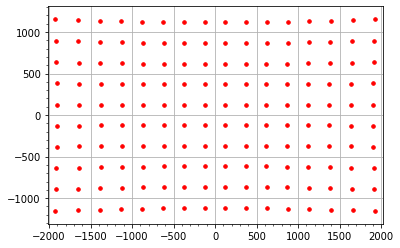

In [ ]:
distortion = np.array([1.39463836e-01  ,-6.82962078e-03 ,1.49562264e-04  ,-1.50391870e-06 ,5.66074856e-09])

grid_size, square_size = [50, 50], 0.2
object_points = np.zeros([grid_size[0] * grid_size[1], 3])
mx, my = [(grid_size[0] - 1) * square_size / 2, (grid_size[1] - 1) * square_size / 2]
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        object_points[i * grid_size[0] + j] = [i * square_size - mx, j * square_size - my, 0]

f, p = [0.004417595 , 120e-8] 
intrinsic = np.array([[f/p, 0, 0], [0, f/p, 0], [0, 0, 0]])
rvec = np.array([0.0, 0.0, 0.0])
tvec = np.array([0.0, 0.0, 3.0])

image_points, jacobian = cv2.projectPoints(object_points, rvec, tvec, intrinsic, distortion)

plt.scatter(*zip(*image_points[:, 0, :]), 50, marker='.',color = 'red')
plt.axis('equal')
plt.xlim(-2016, 2016)
plt.ylim(-1134, 1134)

plt.minorticks_on()
plt.grid()


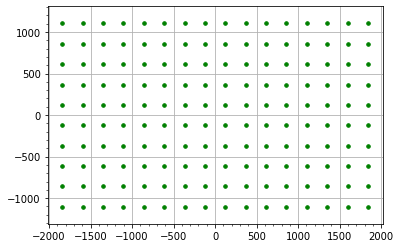

In [ ]:
distortion = np.array([0,0,0,0,0])

grid_size, square_size = [50, 50], 0.2
object_points = np.zeros([grid_size[0] * grid_size[1], 3])
mx, my = [(grid_size[0] - 1) * square_size / 2, (grid_size[1] - 1) * square_size / 2]
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        object_points[i * grid_size[0] + j] = [i * square_size - mx, j * square_size - my, 0]

f, p = [0.004417595 , 120e-8] 
intrinsic = np.array([[f/p, 0, 0], [0, f/p, 0], [0, 0, 0]])
rvec = np.array([0.0, 0.0, 0.0])
tvec = np.array([0.0, 0.0, 3.0])

image_points, jacobian = cv2.projectPoints(object_points, rvec, tvec, intrinsic, 0)

plt.scatter(*zip(*image_points[:, 0, :]), 50, marker='.',color = 'green')
plt.axis('equal')
plt.xlim(-2016, 2016)
plt.ylim(-1134, 1134)

plt.minorticks_on()
plt.grid()
